<a href="https://colab.research.google.com/github/marches/pipeline-spill-detection/blob/main/notebooks/Pixel_labeling_and_initial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Contents:
1. Hand labeling process validation
2. RF results with labeled image

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
from PIL import Image

import numpy as np
import cv2, zlib, base64, io

import json

Mounted at /content/drive


### Load Saved Numpy Arrays

In [2]:
s1b = np.load("/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-06-25-2019.npy")
s1a = np.load("/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-09-28-2019.npy")

s1b_tif = "/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-06-25-2019.tif"
s1a_tif = "/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-09-28-2019.tif"

### Helper Functions (to move to library)

In [3]:
def scale_for_png(sentinel_arr):
  red = sentinel_arr[:,:,2]/np.amax(sentinel_arr[:,:,2])*255
  green = sentinel_arr[:,:,1]/np.amax(sentinel_arr[:,:,1])*255
  blue = sentinel_arr[:,:,0]/np.amax(sentinel_arr[:,:,0])*255
  
  im = np.dstack([red, green, blue])

  im = Image.fromarray(im.astype(np.uint8))

  return im



In [4]:
def base64_2_mask(s):
  z = zlib.decompress(base64.b64decode(s))
  n = np.fromstring(z, np.uint8)
  mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
  return mask

In [5]:
def create_bitmask(img, pixels, origin):
  mask = np.full((img.shape[0], img.shape[1]), False)
  x0 = origin[0]
  x1 = origin[0] + pixels.shape[0]

  y0 = origin[1]
  y1 = origin[1] + pixels.shape[1]

  mask[x0:x1, y0:y1] = pixels
  return mask


### Create png and download

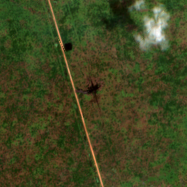

In [6]:
im = scale_for_png(s1a)
im.save("SudanSpill1.jpeg")
im

### Label image 
Upload image to: supervise.ly 

* Use the Bitmap annotation
* Bitmap annotation produces a string which can be deocded to a boolean matrix (https://docs.supervise.ly/data-organization/00_ann_format_navi/04_supervisely_format_objects#bitmap)
  * Adjust bitmap tool selection size to 1 pixel
  * Eraser tool allows de-selection

In [7]:
with open("/content/drive/MyDrive/210 Capstone Project/Data/SudanSpill1.json", "r") as f:
  labels = json.load(f)
labels

{'description': '',
 'tags': [],
 'size': {'height': 187, 'width': 187},
 'objects': [{'id': 1065911893,
   'classId': 10424568,
   'description': '',
   'geometryType': 'bitmap',
   'labelerLogin': 'march',
   'createdAt': '2022-10-17T05:14:53.777Z',
   'updatedAt': '2022-10-17T05:15:15.349Z',
   'tags': [],
   'classTitle': 'oil',
   'bitmap': {'data': 'eJzrDPBz5+WS4mJgYOD19HAJAtICQCzKwQYk/e3yLgGpXk8XxxAL/71TAvkaDDicn/5rv5YZxrw5NUnsp/Fhd/bUbaobt1v0r231msz+Q5Lh/9tEkQWTZnZtbfBKXcHJpcVg8k34gP9RrdD8m3lr/jO7BcfaVlTzPvPg+tC5WNnd2FNbuVCzwU/x9rE19lc8eNS2b6heeKV5wzHJBLNrCU+73hznuBpsGvxg+UQ7DY0DDRbWDFNmJ7AZ8KybD3QYg6ern8s6p4QmALRrSS0=',
    'origin': [85, 83]}}]}

In [ ]:
pixels = labels['objects'][0]['bitmap']['data']
origin = labels['objects'][0]['bitmap']['origin']

pixels = base64_2_mask(pixels)
pixels

### Create oil bitmask ground truth

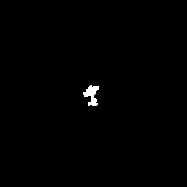

In [19]:
s1a_oil = create_bitmask(s1a, pixels, origin)
Image.fromarray(s1a_oil)

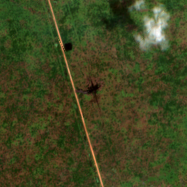

In [20]:
im

### Next: Test with RF etc. 